In [2]:
# import a famous dataset, seaborn nicely contains it out of the box!
import seaborn as sns 
iris = sns.load_dataset('iris') 

iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#TO USE datadotworld PACKAGE:
#1. create account at data.world, then run the next two lines:
#2. in terminal/powershell: pip install datadotworld[pandas]
#
#   IF THIS DOESN'T WORK BC YOU GET AN ERROR ABOUT "CCHARDET", RUN:
#    conda install -c conda-forge cchardet
#   THEN RERUN: pip install datadotworld[pandas] 
#
#3. in terminal/powershell: dw configure          
#3a. copy in API token from data.world (get from settings > advanced)

import datadotworld as dw
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

baby_names = dw.load_dataset('nkrishnaswami/us-ssa-baby-names-national')
baby_names = baby_names.dataframes['names_ranks_counts']
print(baby_names)
print(baby_names.describe())

            name sex  year     rank  count
0           John   M  1880      1.0   9655
1           Mary   F  1880      1.0   7065
2           John   M  1881      1.0   8769
3           Mary   F  1881      1.0   6919
4           John   M  1882      1.0   9557
...          ...  ..   ...      ...    ...
1956693  Zykeira   F  2007  17627.0      5
1956694    Zymia   F  2007  17627.0      5
1956695   Zymira   F  2007  17627.0      5
1956696  Zyniyah   F  2007  17627.0      5
1956697    Zyree   F  2007  17627.0      5

[1956698 rows x 5 columns]
               year          rank         count
count  1.956698e+06  1.956698e+06  1.956698e+06
mean   1.975557e+03  5.177668e+03  1.796945e+02
std    3.419106e+01  4.188603e+03  1.522858e+03
min    1.880000e+03  1.000000e+00  5.000000e+00
25%    1.952000e+03  1.824000e+03  7.000000e+00
50%    1.985000e+03  3.979000e+03  1.200000e+01
75%    2.004000e+03  7.741000e+03  3.200000e+01
max    2.018000e+03  1.762700e+04  9.968600e+04


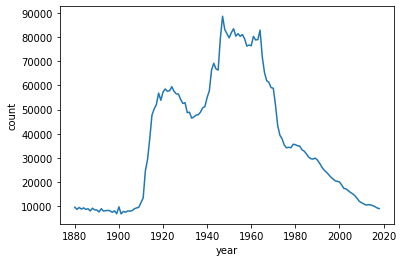

In [23]:
somenames = baby_names.loc[   baby_names['name'] == "John"  ]   # subsample
combined = somenames.groupby('year')['count'].sum().reset_index()
# reset_index takes index columns and puts them as variables
combined
sns.lineplot(data=combined,x='year',y='count')

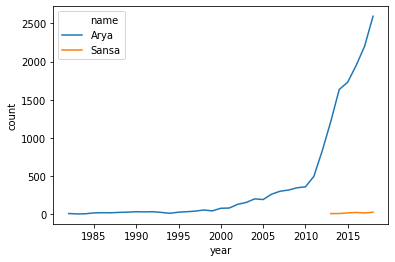

In [33]:

# lets try 2 people! arya and sansa
mynames = (baby_names['name'] == "Sansa" ) | (baby_names['name'] == "Arya" )
somenames = baby_names.loc[  mynames  ]   # subsample
combined = somenames.groupby(['name','year'])['count'].sum().reset_index()
# reset_index takes index columns and puts them as variables
combined
sns.lineplot(data=combined,x='year',y='count',hue='name')

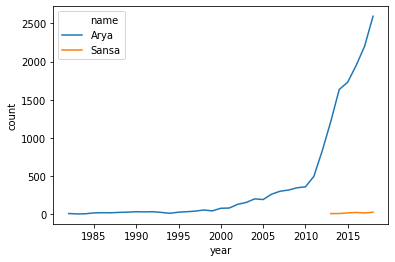

In [37]:
#subsampling made easy w QUERY

#use of triple quote

somenames = baby_names.query('''name in ["Arya","Sansa"]''')   # subsample, query needs a string
combined = somenames.groupby(['name','year'])['count'].sum().reset_index()
combined
# reset_index takes index columns and puts them as variables

sns.lineplot(data=combined,x='year',y='count',hue='name')

In [41]:
# one more tweak - let's get rid of those INTERMEDIATE data objects
# and make it easier to read

(# everything between here is interpreted as one line of code
baby_names
    .query('''name in ["Arya","Sansa"]''')   # subsample
    .groupby(['name','year'])                # for each name-year...
    ['count'].sum()                          # add up the M+F counts
    .reset_index()                           #turn index (year) into variable for plotting function
    .pipe(
    sns.lineplot('data', hue='name',x='year',y='count')
    )

)

TypeError: lineplot() got multiple values for argument 'x'

In [42]:
import pandas as pd
import pandas_datareader as pdr # IF NECESSARY, from terminal: pip install pandas_datareader 
import datetime
import datadotworld as dw # follow instructions for installing and using dw in accompanying lecture
import numpy as np

In [43]:
# get the data
baby_names = dw.load_dataset('nkrishnaswami/us-ssa-baby-names-national')
baby_names = baby_names.dataframes['names_ranks_counts']

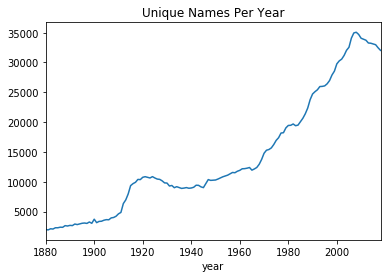

In [44]:
# a silly observation
(baby_names.pivot_table(index='year',values='name',aggfunc='count') # count unique names per year
    .plot.line(title='Unique Names Per Year',legend=False) # plot it, uses panda
) 

In [45]:
(baby_names.sort_values(['year','sex','count'],ascending=False) # sort descending so most popular name first
     .groupby(['year','sex']) # group by year and gender 
     .agg(lambda x: x.iloc[0]) # keep the first (most popular) name each year
     ['name'] # keep only the name variable
     .unstack() # format wide
     [-20:]
)

sex,F,M
year,,
1999,Emily,Jacob
2000,Emily,Jacob
2001,Emily,Jacob
2002,Emily,Jacob
2003,Emily,Jacob
2004,Emily,Jacob
2005,Emily,Jacob
2006,Emily,Jacob
2007,Emily,Jacob


In [46]:
start = datetime.datetime(2010, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2013, 1, 27)
macro_df = pdr.data.DataReader(['GDP','CPIAUCSL'], 'fred', start, end)

In [51]:

# the second variable is CPI, all urban
macro_df
# resample to turn monthly to quarterly
macro_df.describe()

,GDP,CPIAUCSL
count,13.000000,37.000000
mean,15653.550385,224.397351
std,589.174983,5.101731
min,14721.350000,217.199000
25%,15240.843000,219.035000
50%,15591.850000,225.395000
75%,16152.257000,228.590000
max,16569.591000,231.679000


In [54]:
start = datetime.datetime(1960,1,1) # you can specify start and end dates this way
end = datetime.datetime(2018,12,1)
macro_df = pdr.data.DataReader(['RealGDP'], 'fred', start, end)

RemoteDataError: Unable to read URL: https://fred.stlouisfed.org/graph/fredgraph.csv?id=RealGDP